In [1]:

# https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#sphx-glr-auto-tutorials-preprocessing-40-artifact-correction-ica-py
import seaborn
import pyriemann
from new_bci_framework import OfflineSession
from classifier.p300_classifier import P300Classifier
from preprocessing.p300_preprocessing import P300Preprocessing
from config import config
import mne.io.fiff

from sklearn.decomposition import FastICA, PCA
import matplotlib.pyplot as plt
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

path = "C:\\Toolboxes\\bci4als-2022-python\\sessions\\Session_2022-05-19_LB-UNIFIED"
ses: OfflineSession = OfflineSession.load_session(path)
ses.config.SESSION_SAVE_DIR = path
preprocessor = P300Preprocessing(ses.config)
ses.raw_data.filter(l_freq=ses.config.HIGH_PASS_FILTER, h_freq=ses.config.LOW_PASS_FILTER)
ses.raw_data.notch_filter(ses.config.NOTCH_FILTER)
event_dict = {v: k for k, v in ses.config.TRIAL_LABELS.items()}
events = mne.find_events(ses.raw_data, output="onset")
epochs = mne.Epochs(ses.raw_data,
                    events,
                    tmin=ses.config.TRIAL_START_TIME,
                    tmax=ses.config.TRIAL_END_TIME,
                    event_id=event_dict,
                    verbose='INFO',
                    on_missing='warn')

epochs

Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (6.600 sec)



C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.1 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.1 when using version 1.1.1. This might lead to breaking code or

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 825 samples (6.600 sec)

294 events found
Event IDs: [100 200 300]
Not setting metadata
Not setting metadata
294 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Number of events,294
Events,Distractor: 210Non-Target: 42Target: 42
Time range,-0.200 – 1.104 sec
Baseline,-0.200 – 0.000 sec


In [2]:
from mne_icalabel import label_components


Fitting ICA to data using 13 channels (please be patient, this may take a while)
Loading data for 294 events and 164 original time points ...
0 bad epochs dropped


C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
<ipython-input-3-0e9701e1c08c>:3: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Selecting by number: 5 components
Loading data for 294 events and 164 original time points ...
Fitting ICA took 0.4s.
Loading data for 294 events and 164 original time points ...
Not setting metadata
Not setting metadata
294 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Using matplotlib as 2D backend.


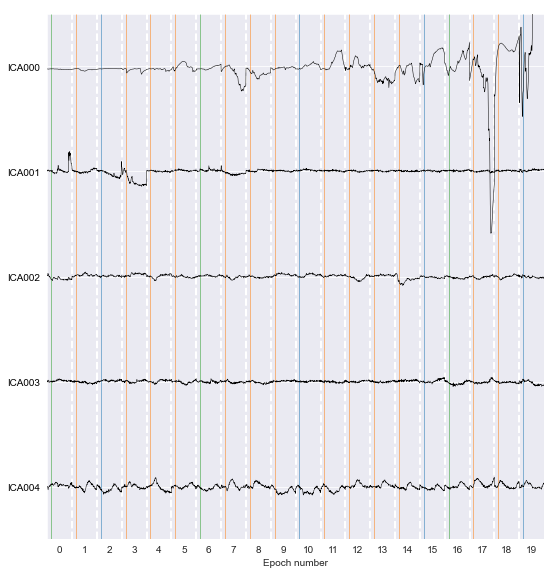

C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packa

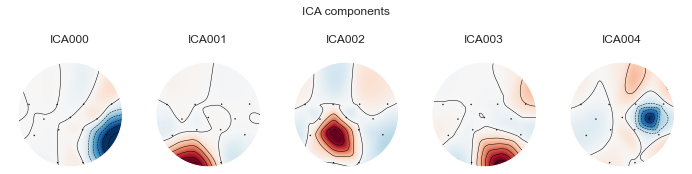

[<MNEFigure size 702x187.56 with 5 Axes>]

In [3]:
# epochs = ses.raw_data
ica = ICA(n_components=5, max_iter='auto', random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs, show_scrollbars=False)
ica.plot_components(inst=epochs)
# epochs.plot()

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Loading data for 294 events and 164 original time points ...
Selecting by number: 13 components


C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
<ipython-input-4-764e75170f6a>:2: RuntimeWarning: The epochs you passed to ICA.fit() were baseline-corrected. However, we suggest to fit ICA only on data that has been high-pass filtered, but NOT baseline-corrected.
  ica.fit(epochs)


Loading data for 294 events and 164 original time points ...
Fitting ICA took 0.5s.
Loading data for 294 events and 164 original time points ...
Not setting metadata
Not setting metadata
294 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


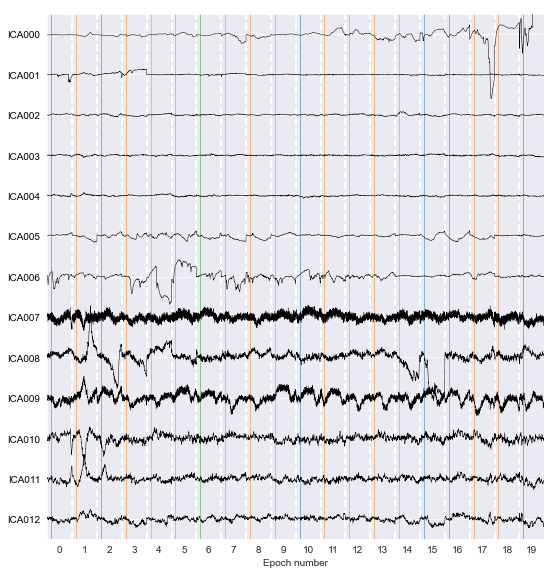

C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
C:\Toolboxes\bci4als-2022-python\venv\lib\site-packa

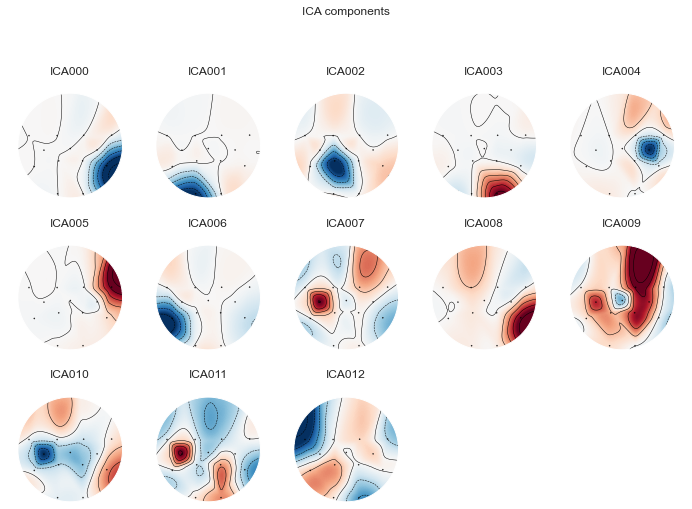

[<MNEFigure size 702x526.68 with 13 Axes>]

In [4]:
ica = ICA(n_components=13, max_iter='auto', random_state=97)
ica.fit(epochs)
ica.plot_sources(epochs, show_scrollbars=False)
ica.plot_components(inst=epochs)

In [5]:
# assuming you have a Raw and ICA instance previously fitted
ic_labels = label_components(epochs, ica, method="iclabel")
print(ic_labels)

Loading data for 294 events and 164 original time points ...


<ipython-input-5-118806275fa1>:2: RuntimeWarning: The provided Epochs instance does not seems to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(epochs, ica, method="iclabel")
<ipython-input-5-118806275fa1>:2: RuntimeWarning: The provided Epochs instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels = label_components(epochs, ica, method="iclabel")
<ipython-input-5-118806275fa1>:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA

{'y_pred_proba': array([0.87356555, 0.6134193 , 0.3800788 , 0.67984706, 0.7741034 ,
       0.5121968 , 0.40688252, 0.8103893 , 0.6256111 , 0.9425628 ,
       0.79030436, 0.55160683, 0.6028925 ], dtype=float32), 'labels': ['muscle artifact', 'muscle artifact', 'other', 'muscle artifact', 'muscle artifact', 'other', 'other', 'other', 'other', 'other', 'brain', 'other', 'brain']}


In [6]:
labels = ic_labels["labels"]
exclude_idx = [idx for idx, label in enumerate(labels) if label not in ["brain", "other"]]
print(f"Excluding these ICA components: {exclude_idx}")

Excluding these ICA components: [0, 1, 3, 4]


In [7]:
ica.plot_overlay(epochs,exclude=exclude_idx)

TypeError: inst must be an instance of Raw or Evoked, got <class 'mne.epochs.Epochs'> instead.

In [ ]:

epochs.plot()


Loading data for 294 events and 164 original time points ...
Applying ICA to Epochs instance
    Transforming to ICA space (13 components)
    Zeroing out 4 ICA components
    Projecting back using 13 PCA components


<ipython-input-8-9b9971dbf6ba>:3: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica.apply(reconst_raw, exclude=exclude_idx, n_pca_components=5)


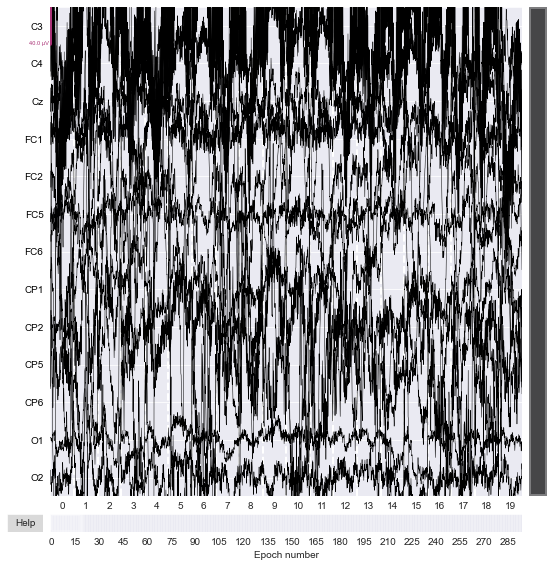

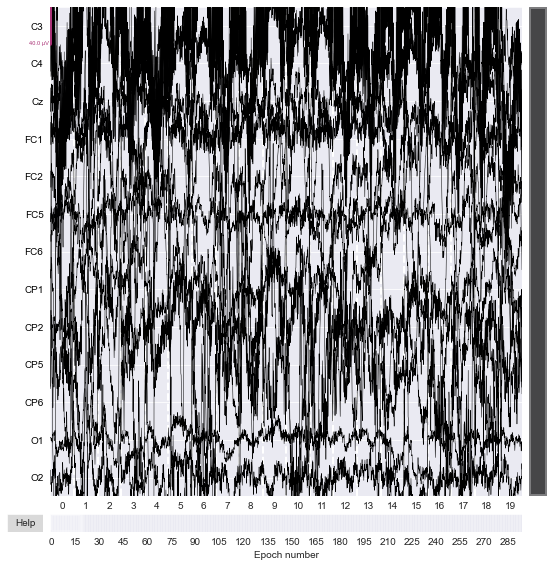

In [8]:
epochs.load_data()
reconst_raw = epochs.copy()
ica.apply(reconst_raw, exclude=exclude_idx, n_pca_components=5)
reconst_raw.plot()

In [9]:
from classifier.p300_classifier import P300Classifier
classifier = P300Classifier(ses.config)
classifier.run(epochs)

labels [100 200 200 200 200 200 200 200 100 200 100 300 100 200 200 100 200 200
 100 100 200 200 200 200 200 300 200 100 200 200 200 100 200 200 200 200
 200 200 100 300 200 200 200 200 100 300 200 200 300 200 200 300 200 200
 200 200 200 200 100 200 200 300 100 100 200 200 200 200 200 200 100 200
 300 200 300 200 200 200 200 200 200 200 200 200 200 300 200 200 200 200
 300 200 200 300 200 200 200 300 200 200 200 200 200 200 200 200 100 200
 200 100 300 100 300 200 200 200 200 200 200 200 200 200 200 300 200 200
 100 200 200 100 200 100 100 200 300 100 200 200 200 300 100 200 300 200
 200 300 300 100 300 200 200 200 200 200 100 200 200 300 300 300 200 100
 300 200 300 100 200 200 200 200 300 200 200 300 200 200 200 200 200 200
 200 100 300 200 200 200 200 200 200 200 200 200 200 100 100 100 100 200
 100 200 200 300 300 200 300]


C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'event_dict' is not defined

In [10]:
classifier.run(reconst_raw)

labels [100 200 200 200 200 200 200 200 100 200 100 300 100 200 200 100 200 200
 100 100 200 200 200 200 200 300 200 100 200 200 200 100 200 200 200 200
 200 200 100 300 200 200 200 200 100 300 200 200 300 200 200 300 200 200
 200 200 200 200 100 200 200 300 100 100 200 200 200 200 200 200 100 200
 300 200 300 200 200 200 200 200 200 200 200 200 200 300 200 200 200 200
 300 200 200 300 200 200 200 300 200 200 200 200 200 200 200 200 100 200
 200 100 300 100 300 200 200 200 200 200 200 200 200 200 200 300 200 200
 100 200 200 100 200 100 100 200 300 100 200 200 200 300 100 200 300 200
 200 300 300 100 300 200 200 200 200 200 100 200 200 300 300 300 200 100
 300 200 300 100 200 200 200 200 300 200 200 300 200 200 200 200 200 200
 200 100 300 200 200 200 200 200 200 200 200 200 200 100 100 100 100 200
 100 200 200 300 300 200 300]


C:\Toolboxes\bci4als-2022-python\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'event_dict' is not defined

In [ ]:
#try a with an  ICA
#AREA UNDER CURVE with a clssifier for the ARE UNDER CURVE
#maybe try a PCA




#RANDOM FOREST CLASSIFIERS
#check if the fact that the data is imbalanced affects the preformances (give a more balanced data and check the results)